## Analysis of 1st day in the Lissek study
Checking amygdala activation in the CS+US condition of the task
- masking amygdala
- avergaing activation
- plot

In [1]:
# load libraries
import glob
import pandas as pd
import numpy as np
import nilearn
import nilearn.plotting
import nilearn.input_data
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
import pingouin as pg
# importing Bayesian methods

import cmdstanpy
import arviz as az

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/_utils/helpers.py:145: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  return func(*args, **kwargs)


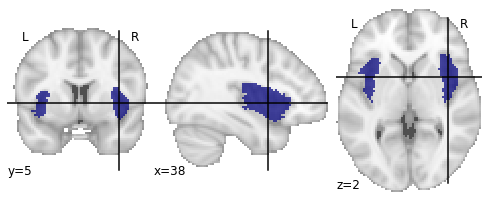

In [2]:
# load mask
mask_file = 'insula_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=8", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)

# create a masker 
fwhm = 4
masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=fwhm, standardize=False, 
                                        detrend=False, verbose=5)

In [3]:
us_condPTSD = glob.glob('/media/Data/Lab_Projects/RCF/neuroimaging/Lissek/LissekLab_CSpS-CSp_PTSD/labs/lisseklab/PTSD_StimGen/Analysis/subject_results/group.PTSD/SG_results/*.results/sub-*_CSpS_CSp_MNI.nii')
us_condCC = glob.glob('/media/Data/Lab_Projects/RCF/neuroimaging/Lissek/LissekLab_CSpS-CSp_TraumaControl/labs/lisseklab/PTSD_StimGen/Analysis/subject_results/group.TraumaControl/SG_results/*.results/sub-*_CSpS_CSp_MNI.nii')


In [4]:
# grab PTSD amygdala activation
us = []
timeseriesIns = []
for f in us_condPTSD:
    print(f)
    sub = os.path.basename(f).split('_')[0]
    print(sub)
    tArr = masker.fit_transform(f)
    meanT = np.mean(tArr,axis=1)
    sem = scipy.stats.sem(tArr, axis=1)
    std = np.std(tArr, axis=1)
    

#     # create datafram for the timeseries
    dfTS = {'subject':sub, 'ts':tArr[0]}
#     # create dataframe for the mean activation
    df = {'subject':sub, 'insula':meanT[0], 'inssem':sem[0], 'insstd':std[0]}
#     #df['subject'] = sub
    us.append(df)
    timeseriesIns.append(dfTS)
ins_udPTSD = pd.DataFrame(us)
tsDf = pd.DataFrame(timeseriesIns)

/media/Data/Lab_Projects/RCF/neuroimaging/Lissek/LissekLab_CSpS-CSp_PTSD/labs/lisseklab/PTSD_StimGen/Analysis/subject_results/group.PTSD/SG_results/103.results/sub-103_CSpS_CSp_MNI.nii
sub-103
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(107, 127, 101, 1),
affine=array([[ -1.5,  -0. ,  -0. ,  79.5],
       [ -0. ,  -1.5,  -0. ,  79.5],
       [  0. ,   0. ,   1.5, -65. ],
       [  0. ,   0. ,   0. ,   1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/Lab_Projects/RCF/neuroimaging/Lissek/LissekLab_CSpS-CSp_PTSD/labs/lisseklab/PTSD_StimGen/Analysis/subject_results/group.PTSD/SG_results/105.results/sub-105_CSpS_CSp_MNI.nii
sub-105
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fi

In [5]:
# grab C amygdala activation
usCC = []
timeseriesInsCC = []
for f in us_condCC:
    print(f)
    sub = os.path.basename(f).split('_')[0]
    print(sub)
    tArr = masker.fit_transform(f)
    meanT = np.mean(tArr,axis=1)
    sem = scipy.stats.sem(tArr, axis=1)
    std = np.std(tArr, axis=1)
    

#     # create datafram for the timeseries
    dfTSCC = {'subject':sub, 'ts':tArr[0]}
#     # create dataframe for the mean activation
    dfCC = {'subject':sub, 'insula':meanT[0], 'inssem':sem[0], 'insstd':std[0]}
#     #df['subject'] = sub
    usCC.append(dfCC)
    timeseriesInsCC.append(dfTS)
ins_udCC = pd.DataFrame(usCC)
tsDfCC = pd.DataFrame(timeseriesInsCC)

/media/Data/Lab_Projects/RCF/neuroimaging/Lissek/LissekLab_CSpS-CSp_TraumaControl/labs/lisseklab/PTSD_StimGen/Analysis/subject_results/group.TraumaControl/SG_results/102.results/sub-102_CSpS_CSp_MNI.nii
sub-102
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(107, 127, 101, 1),
affine=array([[ -1.5,  -0. ,  -0. ,  79.5],
       [ -0. ,  -1.5,  -0. ,  79.5],
       [  0. ,   0. ,   1.5, -65. ],
       [  0. ,   0. ,   0. ,   1. ]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
/media/Data/Lab_Projects/RCF/neuroimaging/Lissek/LissekLab_CSpS-CSp_TraumaControl/labs/lisseklab/PTSD_StimGen/Analysis/subject_results/group.TraumaControl/SG_results/104.results/sub-104_CSpS_CSp_MNI.nii
sub-104
[NiftiMasker.fit] Lo

In [7]:
ins_udPTSD['group'] = "PTSD"
ins_udCC['group'] = 'CC'

ins_ud = pd.concat([ins_udPTSD, ins_udCC]).reset_index(drop=True) # reset the subject's index

# save as csv
#amg_ud.to_csv('lissek_amgCSpSvsCSp.csv', index=False)
ins_ud.head(10)


,subject,insula,inssem,insstd,group
0,sub-103,0.431295,0.007466,0.425953,PTSD
1,sub-105,0.149086,0.004291,0.244796,PTSD
2,sub-106,0.280329,0.005474,0.312295,PTSD
3,sub-108,0.525071,0.006845,0.390530,PTSD
4,sub-110,0.228854,0.005263,0.300277,PTSD
5,sub-111,0.042926,0.007184,0.409870,PTSD
6,sub-115,0.224841,0.005328,0.303984,PTSD
7,sub-117,0.291456,0.004931,0.281331,PTSD
8,sub-118,0.082582,0.004072,0.232319,PTSD
9,sub-120,0.019596,0.004975,0.283841,PTSD


## look at group differences

<AxesSubplot:title={'center':'Insula'}, xlabel='group', ylabel='insula'>

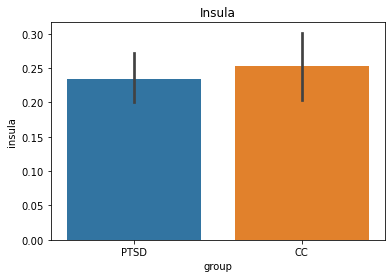

In [8]:
# Plot barplot to see differences
plt.title("Insula")
sns.barplot(x="group", y="insula", data=ins_ud, ci=68)

In [9]:
# run simple one-tailed t-test
t = scipy.stats.ttest_ind(ins_ud['insula'][ins_ud['group']=='CC'],ins_ud['insula'][ins_ud['group']=='PTSD'], 
                     equal_var = True)

# one tailed
t[1] /2

0.37422036521797053

## Use Stan

In [10]:
dg = ins_ud
# changing group to numbers before we run stan model
group = {'CC': 0,'PTSD': 1} 
# setting it as new variable
dg['groupIdx'] = [group[item] for item in dg.group] 

# how many in each group
dg.groupby(['group']).count()

,subject,insula,inssem,insstd,groupIdx
group,,,,,
CC,22,22,22,22,22
PTSD,26,26,26,26,26


In [11]:
data =  {'N': len(dg), 'x': dg['groupIdx'].values, 'y': dg['insula'].values}
sm = cmdstanpy.CmdStanModel(stan_file='Stan_model/simple_model.stan')


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/or/SIA_PTSD/Stan_model/simple_model


In [12]:
seed = 1225 # set random seed
fit_simple_model = sm.sample(
  data = data,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  seed = seed
  #inits = 0.2,
)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


In [13]:
fit_simple_model.summary(percentiles=(4.5,95.5))


,Mean,MCSE,StdDev,4.5%,95.5%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,
lp__,50.000,0.03100,1.300,47.00,51.000,1700.0,17000.0,1.0
alpha,0.250,0.00100,0.044,0.17,0.320,1800.0,19000.0,1.0
beta,-0.018,0.00140,0.061,-0.12,0.084,1800.0,18000.0,1.0
sigma,0.210,0.00048,0.023,0.17,0.250,2300.0,24000.0,1.0


0.37625

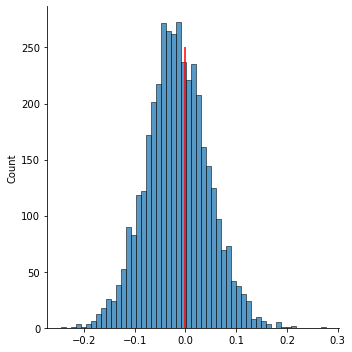

In [14]:
draws_rmu = fit_simple_model.stan_variable(name='beta')
sns.displot(draws_rmu)
plt.vlines(x=0, ymin=0, ymax=250, color='red')
1 - sum(draws_rmu<0) / len(draws_rmu)

<AxesSubplot:title={'center':'beta'}>

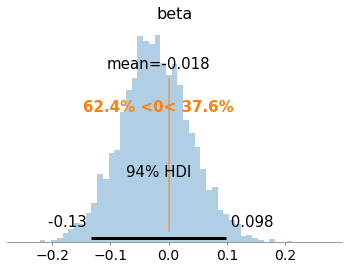

In [15]:
tr = az.from_cmdstanpy(fit_simple_model)
az.plot_posterior(tr, var_names='beta', kind='hist', ref_val=0)

# Check correlation between amg and behavior

In [16]:
dfPCL = pd.read_spss('LissekLab_PTSD_TraumaControl_motion.sav')
# remove the RCF from beginning of subject id

dfPCL
#dfPCL['Identifier'] = dfPCL['Identifier'].astype(str)
#dfPCL
# # because some subjects has two digits, we add zero
for i in dfPCL.iterrows():
   
    dfPCL.at[i[0],'subject'] = 'sub-' + str(int(i[1].Identifier))

#         dfPCL.at[i[0],'subject'] = '0' + i[1].subject

dfPCL = dfPCL.drop("Identifier", axis=1)
dfPCL.head()

,Age,Gender,CAPS_B1F,CAPS_B1I,CAPS_B1FI,CAPS_B2F,CAPS_B2I,CAPS_B2FI,CAPS_B3F,CAPS_B3I,...,PCL_9,PCL_10,PCL_11,PCL_12,PCL_13,PCL_14,PCL_15,PCL_16,PCL_17,subject
0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,sub-102
1,31.0,1.0,2.0,2.0,4.0,2.0,2.0,4.0,0.0,0.0,...,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,sub-103
2,24.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,sub-104
3,33.0,1.0,4.0,1.0,5.0,4.0,2.0,6.0,0.0,0.0,...,4.0,3.0,1.0,1.0,3.0,3.0,4.0,3.0,2.0,sub-106
4,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,sub-107


In [18]:
dfpcl_ins = pd.merge(dfPCL, ins_ud)
dfpcl_ins['pcl_An'] = dfpcl_ins['PCL_8'] + dfpcl_ins['PCL_9'] + dfpcl_ins['PCL_10']+dfpcl_ins['PCL_11'] + dfpcl_ins['PCL_12']# = dfpcl_amg[dfpcl_amg.group.isin(groups)]

In [19]:
dfpcl_ins.groupby(['group']).count()

,Age,Gender,CAPS_B1F,CAPS_B1I,CAPS_B1FI,CAPS_B2F,CAPS_B2I,CAPS_B2FI,CAPS_B3F,CAPS_B3I,...,PCL_14,PCL_15,PCL_16,PCL_17,subject,insula,inssem,insstd,groupIdx,pcl_An
group,,,,,,,,,,,,,,,,,,,,,
CC,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
PTSD,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


# Run stan only on those with both PCL and Amygdala

In [22]:

data2 =  {'N': len(dfpcl_ins), 'x': dfpcl_ins['groupIdx'].values, 'y': dfpcl_ins['insula'].values}

seed = 1225 # set random seed
fit_simple_model2 = sm.sample(
  data = data2,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  seed = seed
  #inits = 0.2,
)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


In [23]:
tr2 = az.from_cmdstanpy(fit_simple_model2)

In [26]:
az.summary(tr, hdi_prob=.89)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.251,0.044,0.180,0.318,0.001,0.001,1844.0,2373.0,1.0
beta,-0.018,0.061,-0.116,0.078,0.001,0.001,1818.0,1993.0,1.0
sigma,0.210,0.023,0.173,0.245,0.000,0.000,2462.0,2453.0,1.0


<AxesSubplot:title={'center':'beta'}>

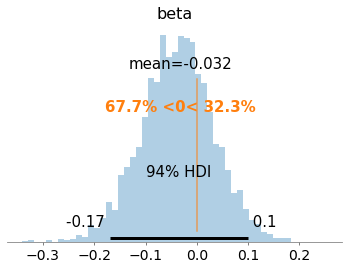

In [27]:
az.plot_posterior(tr2, var_names='beta', kind='hist', ref_val=0)

In [28]:
#str(az.summary(tr, hdi_prob=.9))
t = az.summary(tr, hdi_prob=.89)

In [29]:
# save results as image
import dataframe_image as dfi
dfi.export(t, 'Lissek_OriginalModelInsula.png')

[0410/043054.942407:WARNING:bluez_dbus_manager.cc(248)] Floss manager not present, cannot set Floss enable/disable.


## generate publication plots

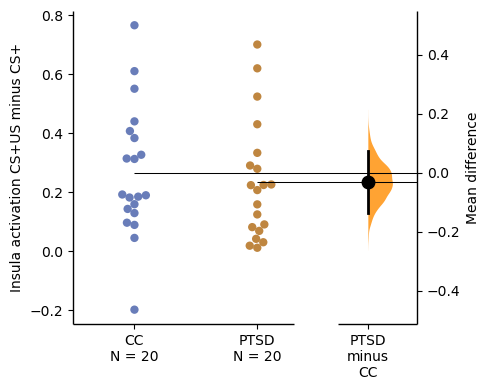

In [30]:
import dabest
groups = ["CC", "PTSD"]
dgr = dfpcl_ins[dfpcl_ins.group.isin(groups)]

# load our data to dabest to produce graphs
dgr = dgr.rename(columns={"insula": "Insula activation CS+US minus CS+", "group": "Group"})
dgr_dabest = dabest.load(data=dgr, x='Group', y='Insula activation CS+US minus CS+', idx=('CC','PTSD'), ci=89)
g2 = dgr_dabest.mean_diff.plot(custom_palette={'CC':'royalblue','PTSD':'darkorange'})
g2.savefig('cleanData_Lissek_Insula.png', dpi=300, bbox_inches="tight")

## Robust regression with Stan
- Using student t instead of normal distribution

In [31]:
data =  {'N': len(dfpcl_ins), 'x': dfpcl_ins['insula'].values, 'y': dfpcl_ins['pcl_An'].values}
sm_robust = cmdstanpy.CmdStanModel(stan_file='Stan_model/robust_reg.stan')


In [32]:
seedRubReg = 148 # set random seed
fit_robust_reg = sm_robust.sample(
  data = data,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  seed = seedRubReg
  #inits = 0.2,
)

In [33]:
fit_robust_reg.summary(percentiles=(4.5, 95.5))

,Mean,MCSE,StdDev,4.5%,95.5%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,
lp__,-99.0,0.048,1.50,-100.0,-97.0,990.0,6100.0,1.0
alpha,12.0,0.032,1.30,9.6,14.0,1600.0,9600.0,1.0
beta,-1.2,0.093,3.70,-7.8,4.9,1600.0,9900.0,1.0
sigma,5.2,0.015,0.65,4.1,6.3,2000.0,12000.0,1.0
nu,25.0,0.580,15.00,7.0,53.0,640.0,3900.0,1.0


In [34]:
fit_robust_reg.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-99.0,0.048,1.50,-100.0,-98.0,-97.0,990.0,6100.0,1.0
alpha,12.0,0.032,1.30,9.8,12.0,14.0,1600.0,9600.0,1.0
beta,-1.2,0.093,3.70,-7.4,-1.2,4.9,1600.0,9900.0,1.0
sigma,5.2,0.015,0.65,4.2,5.1,6.3,2000.0,12000.0,1.0
nu,25.0,0.580,15.00,7.7,22.0,53.0,640.0,3900.0,1.0


In [35]:
tRobust = az.from_cmdstanpy(fit_robust_reg)

In [36]:
dfi.export(az.summary(tRobust, hdi_prob=.89), 'RobustReg_Lissek_ResultsInsula.png')

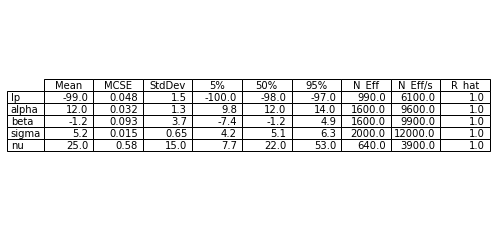

In [37]:
## Create a table
df_fit = fit_robust_reg.summary()
plt.rcParams["figure.figsize"] = [8, 4]
fig, ax =plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df_fit.values,colLabels=df_fit.columns,
         rowLabels=["lp_","alpha","beta", "sigma", "nu"],loc="center")
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


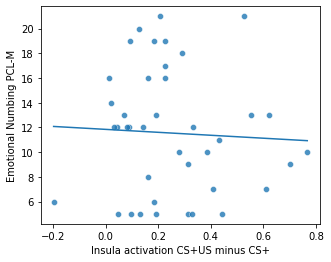

In [38]:
alpha = fit_robust_reg.stan_variable(name='alpha') 
beta = fit_robust_reg.stan_variable(name='beta')
# plot a line based on the robust regression
plt.figure(figsize=(5,4))
line = np.mean(alpha) + np.mean(beta)*dfpcl_ins.insula
fgrid = sns.scatterplot(y='pcl_An', x='insula',data=dfpcl_ins, alpha=0.8)
#plt.plot(dfpcl_amg.amygdala, line)#,alpha = 0.8)
sns.lineplot(dfpcl_ins.insula, line)
fgrid.set(ylabel='Emotional Numbing PCL-M', xlabel='Insula activation CS+US minus CS+')
plt.savefig('Lissek_robustRegressionInsula.png', dpi=300, bbox_inches="tight")